In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
ground_football = {
    'initial': np.array([0.719, 0.555, 0.805, 0.766]),
    'rebound': np.array([0.421, 0.336, 0.485, 0.452])
}

ground_football_sqrt = {
    'initial': np.sqrt(ground_football['initial']),
    'rebound': np.sqrt(ground_football['rebound'])
}

x = ground_football_sqrt['initial']
y = ground_football_sqrt['rebound']

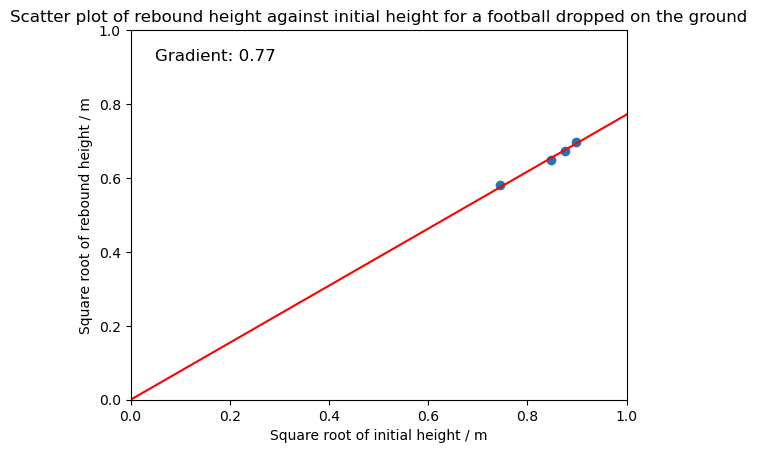

<Figure size 1920x1440 with 0 Axes>

In [5]:
plt.scatter(x, y)

plt.xlabel('Square root of initial height / m')
plt.ylabel('Square root of rebound height / m')
plt.title('Scatter plot of rebound height against initial height for a football dropped on the ground')

# Calculate the slope of the trendline passing through the origin
slope = np.sum(x * y) / np.sum(x * x)

# Generate trendline values
trendline_x = np.linspace(0, 1, 100)
trendline_y = slope * trendline_x

# Plot the trendline
plt.plot(trendline_x, trendline_y, color='red')
plt.text(0.05, 0.95, f'Gradient: {round(slope, 2)}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Set the scale of both axes to be from 0 to 1
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.figure(dpi=300)
plt.show()